In this session we want to experiment with extracting data from a website by using an [API](https://cloud.google.com/endpoints/docs/openapi/when-why-api-key) (application programming interface) key. 
<br>
A great example of this is finding out how many Brisbane citycycle bikes are available and where they are located.
<br>
You need a personal API key to get dynamic data (because bike availability may change at any second).
<br>
So, first you need to register with https://developer.jcdecaux.com to get an api key.

Next, we need to import the [JSON](https://docs.python.org/3.7/library/json.html?highlight=json#json.dump) package and the urlopen function from [urllib.request](https://docs.python.org/3.7/library/urllib.request.html#module-urllib.request) module.
<br>
[JSON](https://www.json.org/) (JavaScript Object Notation) "is a lightweight data-interchange format, based on a subset of the JavaScript Programming Language".
<br>
For now, all you need to know is that it is syntax that allows you to store and exchange data (the backend of this document is in JSON). 
<br>
If you are curious, there is a gentle introduction to using JSON in python [here](https://realpython.com/python-json/).

In [1]:
import json
from urllib.request import urlopen

In [2]:
api_key =input('paste your api_key here')

paste your api_key here404a234cb7dc7711b84343639e18d9955e554a00


In [3]:
print(api_key)

404a234cb7dc7711b84343639e18d9955e554a00


In [4]:
contract_name = 'Brisbane'

url_station_list='https://api.jcdecaux.com/vls/v1/stations?contract={contract_name}&apiKey={api_key}'

response = urlopen(url_station_list.format(contract_name=contract_name, api_key=api_key))

station_list = json.load(response)

Next, you want to look at the [real-time data](https://developer.jcdecaux.com/#/opendata/vls?page=dynamic) by printing it.

In [5]:
print(station_list)

[{'number': 122, 'contract_name': 'Brisbane', 'name': '122 - LOWER RIVER TCE / ELLIS ST', 'address': 'Lower River Tce / Ellis St', 'position': {'lat': -27.482279, 'lng': 153.028723}, 'banking': True, 'bonus': False, 'bike_stands': 16, 'available_bike_stands': 2, 'available_bikes': 12, 'status': 'OPEN', 'last_update': 1547814086000}, {'number': 55, 'contract_name': 'Brisbane', 'name': '55 - ALDEN ST / WICKHAM ST', 'address': 'Alden St / Wickham St', 'position': {'lat': -27.456085, 'lng': 153.03453}, 'banking': True, 'bonus': False, 'bike_stands': 15, 'available_bike_stands': 12, 'available_bikes': 2, 'status': 'OPEN', 'last_update': 1547814370000}, {'number': 35, 'contract_name': 'Brisbane', 'name': '35 - ANNERLEY ROAD / STANLEY STREET', 'address': 'Annerley Road and Stanley Street', 'position': {'lat': -27.486498, 'lng': 153.028874}, 'banking': True, 'bonus': False, 'bike_stands': 28, 'available_bike_stands': 19, 'available_bikes': 5, 'status': 'OPEN', 'last_update': 1547814428000}, {'

Since this is hard to read, we can reformat the results using the command:

In [6]:
print(json.dumps(station_list,indent=4,sort_keys=True))

[
    {
        "address": "Lower River Tce / Ellis St",
        "available_bike_stands": 2,
        "available_bikes": 12,
        "banking": true,
        "bike_stands": 16,
        "bonus": false,
        "contract_name": "Brisbane",
        "last_update": 1547814086000,
        "name": "122 - LOWER RIVER TCE / ELLIS ST",
        "number": 122,
        "position": {
            "lat": -27.482279,
            "lng": 153.028723
        },
        "status": "OPEN"
    },
    {
        "address": "Alden St / Wickham St",
        "available_bike_stands": 12,
        "available_bikes": 2,
        "banking": true,
        "bike_stands": 15,
        "bonus": false,
        "contract_name": "Brisbane",
        "last_update": 1547814370000,
        "name": "55 - ALDEN ST / WICKHAM ST",
        "number": 55,
        "position": {
            "lat": -27.456085,
            "lng": 153.03453
        },
        "status": "OPEN"
    },
    {
        "address": "Annerley Road and Stanley Street",
  

It should look something like this:
<br>
<br>
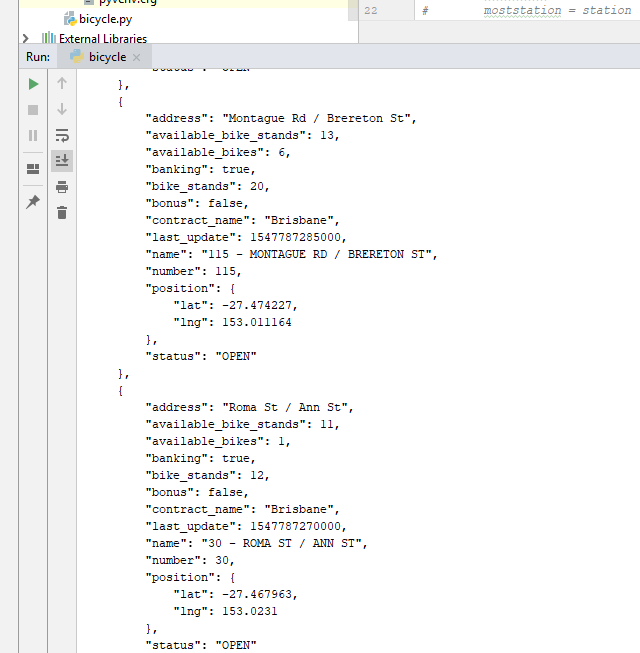

### Now the challlenge is to write a piece of code to:
    + find  where the station with the most available bikes are
    + and find out how many bikes are available at that station
<br>
<br>
I encourage you to think about this and really try before looking at the citycycle.py file or solution below.
<br>
<br>
<br>
<br>
<br>

There are many ways of completing this challenging and Tim has provided one way of doing it.
<br>

With some help (thanks Sam), I have decided to do something else, but it is also an *if statement* inside a *for loop*.
<br>
First, I made the variable most_bikes = zero as I want to replace it with the highest number every time python goes through each entry in the list of stations.

In [7]:
most_bikes=0

Next the for loop in the format
<br>
    for item in list:

In [8]:
for station in station_list:
    if station['available_bikes'] > most_bikes:
        most_bikes = station["available_bikes"]
        most_station = station

What is going on in this *if statement* ?
In the first entry of the station list, I have told python that is the number of available bikes is greater than 0 
<br>
then store this new value into my variable most_bikes
<br>
Now most_bikes after one entry will be a number e.g., 17.
<br>
Then I have applied the same principle to each station by making a new variable called most_station.
<br>
I am now telling python to store the station entry that has the value with the most bikes.
<br>
<br>
**Confused?**
<br>
<br>
Imagine this:
<br>
         Station A = 7
<br>
         Station B = 12
<br>
         Station C = 4
<br>
         Station D = 31
<br>
         Station E = 0
<br>

Now every time that python goes down one entry it checks to see if the value of available bikes is higher than the previous, if it is, then most_bikes is replaced by the higher number, if not, then most_bikes remains unchanged.
<br>
Since most_bikes is = 31, the station is Station D.
<br>
I want to make that station equal to the variable moststation

To print the results we use the print command:

In [9]:
print(most_station)

{'number': 141, 'contract_name': 'Brisbane', 'name': '141 - LAND ST / CORONATION DR', 'address': 'Land St / Coronation Dr', 'position': {'lat': -27.479453, 'lng': 152.997215}, 'banking': True, 'bonus': False, 'bike_stands': 35, 'available_bike_stands': 1, 'available_bikes': 32, 'status': 'OPEN', 'last_update': 1547814439000}


Again, we can reformat the results to make it more legible to a human using the command:

In [10]:
print(json.dumps(most_station,indent=4,sort_keys=True))

{
    "address": "Land St / Coronation Dr",
    "available_bike_stands": 1,
    "available_bikes": 32,
    "banking": true,
    "bike_stands": 35,
    "bonus": false,
    "contract_name": "Brisbane",
    "last_update": 1547814439000,
    "name": "141 - LAND ST / CORONATION DR",
    "number": 141,
    "position": {
        "lat": -27.479453,
        "lng": 152.997215
    },
    "status": "OPEN"
}
